In [51]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
connection= sqlite3.connect('data/autopilot.db3')
cursor=connection.execute("""SELECT name FROM sqlite_master  
  WHERE type='table';""")

for row in cursor:
    print("table : ", row[0])



table :  activitesMissions
table :  activitesType
table :  missionsType
table :  sqlite_sequence
table :  competences
table :  semaine
table :  consultantsCompetences
table :  timeSheet
table :  django_migrations
table :  auth_group_permissions
table :  auth_user_groups
table :  auth_user_user_permissions
table :  django_admin_log
table :  django_content_type
table :  auth_permission
table :  auth_group
table :  auth_user
table :  django_session
table :  consultant
table :  missions
table :  clients
table :  RapportActivite
table :  ImportTimeSheet


In [53]:
df=pd.read_csv('data/rapports_sur_les_activites_01_01_2022_21_03_2022.csv',sep=";")
df


,Nom complet,Département,Code Clients,Nom Clients,Code Projet/Régie,Nom Projet/Régie,Code Phase/Mission,Nom Phase/Mission,Code Tâche,Nom Tâche,Date de début,Date de fin,Temps imputé (Jours)
0,Eric Ceyral,CONSEIL,18,ISAI,181,BMAT - DD,1811,BMAT - DD,NaN,NaN,01/01/2022,21/03/2022,"7,75"
1,Eric Ceyral,CONSEIL,58,Lares,581,VDD Lares,5811,VDD Lares,NaN,NaN,01/01/2022,21/03/2022,"13,25"
2,Eric Ceyral,CONSEIL,1,Cloudixio,15,Avant-vente/commercial,151,Avant-vente/commercial,NaN,NaN,01/01/2022,21/03/2022,"1,75"
3,Eric Ceyral,CONSEIL,1,Cloudixio,17,Projet interne,172,ERP interne,NaN,NaN,01/01/2022,21/03/2022,7
4,Eric Ceyral,CONSEIL,170,Pandat,1702,Pandat - Base de Deals,17021,Design Sprint,NaN,NaN,01/01/2022,21/03/2022,"5,75"
5,Eric Ceyral,CONSEIL,192,Marsh SAS,1921,Marsh Cadrage SAM,19211,Cadrage,NaN,NaN,01/01/2022,21/03/2022,"0,5"
6,Nicolas Entressangle,DELIVERY,155,Les Compagnons,1551,Pilotage DSI Les Compagnons,15511,PMO NEN,155111.0,Application Hébergement et restauration (rédac...,01/01/2022,21/03/2022,"12,5"
7,Nicolas Entressangle,DELIVERY,155,Les Compagnons,1551,Pilotage DSI Les Compagnons,15511,PMO NEN,155113.0,Parcours de formation,01/01/2022,21/03/2022,1
8,Nicolas Entressangle,DELIVERY,1,Cloudixio,12,Partenariat Leapwork,121,Formation Leapwork,NaN,NaN,01/01/2022,21/03/2022,6
9,Nicolas Entressangle,DELIVERY,3,Hors Smart-Capital/ Cloudixio,31,Hors Smart-Capital / CloudixIO,311,Hors Smart-Capital / CloudixIO,3111.0,Hors SmartCapital / CloudixIO,01/01/2022,21/03/2022,1


In [54]:
df.isnull().sum()

 Nom complet             0
Département              0
Code Clients             0
Nom Clients              0
Code Projet/Régie        0
Nom Projet/Régie         0
Code Phase/Mission       0
Nom Phase/Mission        0
Code Tâche              30
Nom Tâche               30
Date de début            0
Date de fin              0
Temps imputé (Jours)     0
dtype: int64

In [35]:
len(df)

44

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0    Nom complet          44 non-null     object 
 1   Département           44 non-null     object 
 2   Code Clients          44 non-null     int64  
 3   Nom Clients           44 non-null     object 
 4   Code Projet/Régie     44 non-null     int64  
 5   Nom Projet/Régie      44 non-null     object 
 6   Code Phase/Mission    44 non-null     int64  
 7   Nom Phase/Mission     44 non-null     object 
 8   Code Tâche            14 non-null     float64
 9   Nom Tâche             14 non-null     object 
 10  Date de début         44 non-null     object 
 11  Date de fin           44 non-null     object 
 12  Temps imputé (Jours)  44 non-null     object 
dtypes: float64(1), int64(3), object(9)
memory usage: 4.6+ KB


In [56]:
nb_null= df['Nom Tâche'].isnull().sum()
nb_null

30

In [57]:
df['Nom Tâche'].unique()

array([nan,
       'Application Hébergement et restauration (rédaction CDC, atelier)',
       'Parcours de formation', 'Hors SmartCapital / CloudixIO',
       'Application Changement de ville (recette)', 'KT Project Office',
       'KT S4M  Conversion to S/4', 'KT SAP Smart ToolBox',
       'Mise en place partenariat HubSpot'], dtype=object)

In [58]:
df['Code Tâche']=df['Code Tâche'].fillna(0.0)

In [59]:
df['Nom Tâche']=df['Nom Tâche'].fillna(" ")

In [60]:
df

,Nom complet,Département,Code Clients,Nom Clients,Code Projet/Régie,Nom Projet/Régie,Code Phase/Mission,Nom Phase/Mission,Code Tâche,Nom Tâche,Date de début,Date de fin,Temps imputé (Jours)
0,Eric Ceyral,CONSEIL,18,ISAI,181,BMAT - DD,1811,BMAT - DD,0.0,,01/01/2022,21/03/2022,"7,75"
1,Eric Ceyral,CONSEIL,58,Lares,581,VDD Lares,5811,VDD Lares,0.0,,01/01/2022,21/03/2022,"13,25"
2,Eric Ceyral,CONSEIL,1,Cloudixio,15,Avant-vente/commercial,151,Avant-vente/commercial,0.0,,01/01/2022,21/03/2022,"1,75"
3,Eric Ceyral,CONSEIL,1,Cloudixio,17,Projet interne,172,ERP interne,0.0,,01/01/2022,21/03/2022,7
4,Eric Ceyral,CONSEIL,170,Pandat,1702,Pandat - Base de Deals,17021,Design Sprint,0.0,,01/01/2022,21/03/2022,"5,75"
5,Eric Ceyral,CONSEIL,192,Marsh SAS,1921,Marsh Cadrage SAM,19211,Cadrage,0.0,,01/01/2022,21/03/2022,"0,5"
6,Nicolas Entressangle,DELIVERY,155,Les Compagnons,1551,Pilotage DSI Les Compagnons,15511,PMO NEN,155111.0,Application Hébergement et restauration (rédac...,01/01/2022,21/03/2022,"12,5"
7,Nicolas Entressangle,DELIVERY,155,Les Compagnons,1551,Pilotage DSI Les Compagnons,15511,PMO NEN,155113.0,Parcours de formation,01/01/2022,21/03/2022,1
8,Nicolas Entressangle,DELIVERY,1,Cloudixio,12,Partenariat Leapwork,121,Formation Leapwork,0.0,,01/01/2022,21/03/2022,6
9,Nicolas Entressangle,DELIVERY,3,Hors Smart-Capital/ Cloudixio,31,Hors Smart-Capital / CloudixIO,311,Hors Smart-Capital / CloudixIO,3111.0,Hors SmartCapital / CloudixIO,01/01/2022,21/03/2022,1


<AxesSubplot:xlabel='Code Clients', ylabel='Date de début'>

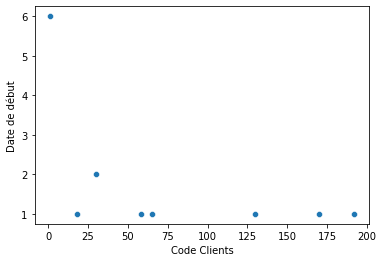

In [61]:
df_filtered= df[df.Département=="CONSEIL"]
df_filtered=df_filtered.groupby('Code Clients').count()
sns.scatterplot(x='Code Clients',y='Date de début',data=df_filtered)

In [62]:
df_test=df.groupby('Code Clients').count()
df_test['Date de début']

Code Clients
1      17
3       2
18      1
30      2
58      1
59      1
61      1
65      2
130     1
155     4
170     3
171     8
192     1
Name: Date de début, dtype: int64

<AxesSubplot:xlabel='Code Clients', ylabel='Date de début'>

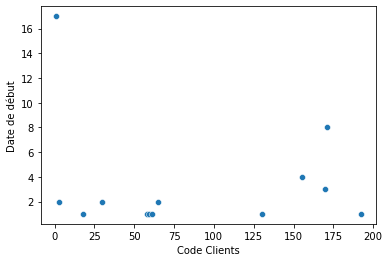

In [63]:
sns.scatterplot(x='Code Clients',y='Date de début',data=df_test)

In [65]:
df.dtypes

 Nom complet             object
Département              object
Code Clients              int64
Nom Clients              object
Code Projet/Régie         int64
Nom Projet/Régie         object
Code Phase/Mission        int64
Nom Phase/Mission        object
Code Tâche              float64
Nom Tâche                object
Date de début            object
Date de fin              object
Temps imputé (Jours)     object
dtype: object

In [66]:
df.describe

<bound method NDFrame.describe of              Nom complet Département  Code Clients  \
0            Eric Ceyral     CONSEIL            18   
1            Eric Ceyral     CONSEIL            58   
2            Eric Ceyral     CONSEIL             1   
3            Eric Ceyral     CONSEIL             1   
4            Eric Ceyral     CONSEIL           170   
5            Eric Ceyral     CONSEIL           192   
6   Nicolas Entressangle    DELIVERY           155   
7   Nicolas Entressangle    DELIVERY           155   
8   Nicolas Entressangle    DELIVERY             1   
9   Nicolas Entressangle    DELIVERY             3   
10  Nicolas Entressangle    DELIVERY           155   
11  Nicolas Entressangle    DELIVERY            61   
12         Olivia Faraut    SOFTWARE             1   
13         Olivia Faraut    SOFTWARE             1   
14         Olivia Faraut    SOFTWARE            65   
15         Cécile Prayer    DELIVERY           171   
16         Cécile Prayer    DELIVERY           1

In [73]:
list_consultant=connection.execute("""SELECT * FROM consultant
  """)

for row in list_consultant:
    print("consultant = ", row[0], row[1],row[2])

consultant =  1 Ceyral Eric
consultant =  2 Maindron Mickael
consultant =  3 Roussel David
consultant =  4 Ricart Olivier
consultant =  5 Catania Gorka
consultant =  6 Jean-Denis Gorkin
consultant =  7 Chacha Ahmed-Yassin
consultant =  8 Beback Hal
consultant =  9 test Jérôme


In [74]:
list_missions=connection.execute("""SELECT * FROM missions
  """)

for row in list_missions:
    print("mission = ", row[0], row[1],row[2],row[3],row[4])

mission =  1 1 2022-01-10 00:00:00 2022-02-19 00:00:00 LARES VDD
mission =  2 2 2021-12-16 2022-02-19 ISAI BMAT
mission =  3 6 2022-02-01 00:00:00 2022-07-31 00:00:00 Autopilot : ERP Interne Cloudixio
mission =  4 4 2022-02-08 2022-03-25 PANDAT - Base de deals
mission =  5 2 2022-03-14 2022-04-30 Mouratoglou


In [75]:
list_competences_consultants=connection.execute("""SELECT * FROM consultantsCompetences
  """)

for row in list_competences_consultants:
    print("competences consultants = ", row[0], row[1],row[2])

competences consultants =  8 1 1
competences consultants =  2 1 2
competences consultants =  8 2 3
competences consultants =  3 2 4
competences consultants =  4 1 5
competences consultants =  8 3 6
competences consultants =  3 1 7
competences consultants =  10 1 8
competences consultants =  9 7 9
competences consultants =  1 9 10
competences consultants =  5 6 11
competences consultants =  6 6 12
competences consultants =  1 8 13
competences consultants =  2 8 14
competences consultants =  7 8 15
competences consultants =  2 6 16
competences consultants =  1 6 17


In [76]:
list_competences_consultants=connection.execute("""PRAGMA table_info("missions");
  """)

for row in list_competences_consultants:
    print("columns = ", row[1])

columns =  idMission
columns =  idMissionType
columns =  startDate
columns =  endDate
columns =  nomMission
columns =  idMissionLucca


In [83]:
list_timesheet=connection.execute("""SELECT * FROM TIMESHEET""");

print('         idTimeSheet idMission')
for row in list_timesheet:

    print(" Timesheet:  ", row[0],"        ",row[1])

         idTimeSheet idMission
 Timesheet:   1          1
 Timesheet:   2          2
 Timesheet:   3          2
 Timesheet:   4          1
 Timesheet:   5          1
 Timesheet:   6          1
 Timesheet:   7          1
 Timesheet:   8          1
 Timesheet:   9          1
 Timesheet:   10          1
 Timesheet:   11          1
 Timesheet:   12          1
 Timesheet:   13          1
 Timesheet:   14          1
 Timesheet:   15          2
 Timesheet:   16          2
 Timesheet:   17          2
 Timesheet:   18          2
 Timesheet:   19          2
 Timesheet:   20          2
 Timesheet:   21          2
 Timesheet:   22          2
 Timesheet:   23          2
 Timesheet:   24          3
 Timesheet:   25          3
 Timesheet:   26          3
 Timesheet:   27          3
 Timesheet:   28          3
 Timesheet:   29          3
 Timesheet:   30          4
 Timesheet:   31          4
 Timesheet:   32          4
 Timesheet:   33          4
 Timesheet:   34          4
 Timesheet:   35          

In [89]:
list_timesheet=connection.execute("""SELECT * FROM RapportActivite""");

print('                      nom          Département')
for row in list_timesheet:

    print(" Rapport Activite :  ", row[0],"        ",row[1])

                      nom          Département
 Rapport Activite :   Test          Departement
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Eric Ceyral          CONSEIL
 Rapport Activite :   Nicolas Entressangle          DELIVERY
 Rapport Activite :   Nicolas Entressangle          DELIVERY
 Rapport Activite :   Nicolas Entressangle          DELIVERY
 Rapport Activite :   Nicolas Entressangle          DELIVERY
 Rapport Activite :   Nicolas Entressangle          DELIVERY
 Rapport Activite :   Nicolas Entressangle          DELIVERY
 Rapport Activite :   Olivia Faraut          SOFTWARE
 Rapport Activite :   Oliv

In [80]:

strSql = """
INSERT INTO RapportActivite(
    NomComplet,
    Departement,
    CodeClient,
    NomClient,
    CodeProjetRegie,
    NomProjetRegie,
    CodePhaseMission,
    NomPhaseMission,
    CodeTacheMission,
    NomTacheMission,
    DateDebut,
    DateFin,
    TempImpute
) 
VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)"""
#print(strSql)
cursor.execute(strSql, ("Test", "Departement", 12, "Nom Client", "CodeProjet","NomProjet","CodePhaseMission","NomPhaseMission","CodeTache","NomTach",100000,10000,2))

def printChamp(strChamp):
    if type(row[strChamp]) == "string":
        print(strChamp+ " -> " + row[strChamp])
    else:
        print(strChamp + " -> " + row[strChamp].to_string())

for index, row in df.iterrows():
    a = {} 
    for column in df:
        print("colum name : " + column + " -> " + str(type(row[column])) + " -> " + str(row[column])) 
        a=row
    cursor.execute(strSql, row)
    print(a)
    print('-----------------------------------')
#    print("Nom Complet -> "+ row["Département"])
#Code Clients;Nom Clients;Code Projet/Régie;Nom Projet/Régie;Code Phase/Mission;Nom Phase/Mission;Code Tâche;Nom Tâche;Date de début;Date de fin;Temps imputé (Jours) 
cur.close()
conn.commit()

colum name :  Nom complet -> <class 'str'> -> Eric Ceyral
colum name : Département -> <class 'str'> -> CONSEIL
colum name : Code Clients -> <class 'int'> -> 18
colum name : Nom Clients -> <class 'str'> -> ISAI
colum name : Code Projet/Régie -> <class 'int'> -> 181
colum name : Nom Projet/Régie -> <class 'str'> -> BMAT - DD
colum name : Code Phase/Mission -> <class 'int'> -> 1811
colum name : Nom Phase/Mission -> <class 'str'> -> BMAT - DD
colum name : Code Tâche -> <class 'float'> -> 0.0
colum name : Nom Tâche -> <class 'str'> ->  
colum name : Date de début -> <class 'str'> -> 01/01/2022
colum name : Date de fin -> <class 'str'> -> 21/03/2022
colum name : Temps imputé (Jours) -> <class 'str'> -> 7,75
 Nom complet            Eric Ceyral
Département                 CONSEIL
Code Clients                     18
Nom Clients                    ISAI
Code Projet/Régie               181
Nom Projet/Régie          BMAT - DD
Code Phase/Mission             1811
Nom Phase/Mission         BMAT - DD
C

NameError: name 'cur' is not defined